Step 1: Install Necessary Libraries

In [39]:
# Install necessary libraries
!pip install tensorflow pandas numpy scikit-learn matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Loading the Dataset


In [40]:
# Load the dataset
data_path = '/content/grammar_correction_pairs.csv'
df = pd.read_csv(data_path)

# Check the first few rows
df.head()


,incorrect_sentence,correct_sentence
0,මම යන්නෙමු,මම යන්නෙමි
1,මම යන්නෙමුවා,මම යන්නෙමි
2,මම යන්නෙහි,මම යන්නෙමි
3,මම යන්නෙහිවා,මම යන්නෙමි
4,මම යන්නේය,මම යන්නෙමි


Step 3: Preprocessing the Data

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['incorrect_sentence'].values)
tokenizer.fit_on_texts(df['correct_sentence'].values)

# Convert sentences to sequences of integers
X = tokenizer.texts_to_sequences(df['incorrect_sentence'].values)
y = tokenizer.texts_to_sequences(df['correct_sentence'].values)

# Find the maximum sequence length
max_len = max([len(sentence.split()) for sentence in df['incorrect_sentence']])

# Pad sequences to the same length
X_pad = pad_sequences(X, maxlen=max_len, padding='post')
y_pad = pad_sequences(y, maxlen=max_len, padding='post')


Step 4: Preparing Train/Test Split

In [42]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_pad, test_size=0.2, random_state=42)


Step 5: Build the LSTM Model

In [43]:
# Create the LSTM model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len))

# LSTM layer
model.add(LSTM(128, return_sequences=True))

# Dropout to prevent overfitting
model.add(Dropout(0.2))

# Output layer
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Step 6: Train the Model

In [44]:
# Train the model
history = model.fit(X_train, np.expand_dims(y_train, -1), epochs=10, batch_size=32, validation_data=(X_test, np.expand_dims(y_test, -1)))


Epoch 1/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.4745 - loss: 2.8236 - val_accuracy: 0.8327 - val_loss: 0.6060
Epoch 2/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8567 - loss: 0.5222 - val_accuracy: 0.9100 - val_loss: 0.3163
Epoch 3/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9081 - loss: 0.3087 - val_accuracy: 0.9251 - val_loss: 0.2267
Epoch 4/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9194 - loss: 0.2388 - val_accuracy: 0.9305 - val_loss: 0.1929
Epoch 5/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9254 - loss: 0.2016 - val_accuracy: 0.9340 - val_loss: 0.1731
Epoch 6/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9299 - loss: 0.1850 - val_accuracy: 0.9345 - val_loss: 0.1641
Epoch 7/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9345 - loss: 0.1712 - val_accuracy: 0.9367 - val_loss: 0.1545
Epoch 8/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9352 - loss: 0.1660 - v

Step 7: Evaluate the Model

In [45]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, np.expand_dims(y_test, -1))
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9471 - loss: 0.1369
Test Loss: 0.14316169917583466
Test Accuracy: 0.9432247281074524


Step 8: Grammar Correction

In [47]:
def predict_grammar(sentence):
    # Tokenize and pad the input sentence
    seq = tokenizer.texts_to_sequences([sentence])
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post')

    # Predict
    prediction = model.predict(padded_seq)

    # Decode the prediction, ensuring we handle None values properly
    pred_sentence = []
    for i in np.argmax(prediction, axis=-1)[0]:
        word = tokenizer.index_word.get(i)
        if word is not None:
            pred_sentence.append(word)

    return ' '.join(pred_sentence)

# Example test with a few sentences
incorrect_sentences = [
    "මම යන්නෙමු",
    "අපි යනවා",
    "මම යන්නෝය",
    "අපි යයි",
    "මම ගියෙමු"
]

corrected_sentences = [predict_grammar(sentence) for sentence in incorrect_sentences]

# Display input and corrected sentences
for i in range(len(incorrect_sentences)):
    print(f"Input: {incorrect_sentences[i]}")
    print(f"Corrected: {corrected_sentences[i]}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Input: මම යන්නෙමු
Corrected: මම යන්නෙමි

Input: අපි යනවා
Corrected: අපි යැවෙමි

Input: මම යන්නෝය
Corrected: මම යන්නෙමි

Input: අපි යයි
Corrected: අපි යමු

Input: මම ගියෙමු
Corrected: මම ගියෙමි



Step 9: Display Results for the Given Paragraphs

In [50]:
# Provided sentences
incorrect_paragraphs = [
    "මම යන්නෙමු. මම යන්නෙමි. මම යන්නෙමුවා. ",
    "අපි යනවා. මම යන්නෙමු.අපි යනවා. මම යැවෙමි. ",
    "මම යන්නෝය. මම යමි. මම යයි. මම යමි. මම යව. මම යමි.",
    "අපි යයි. අපි යමු. අපි යන්න. අපි යමු. අපි යවති.අපි යමු. ",
    "මම ගියෙමු. මම ගියෙමි. අපි යනු. අපි ගියෙමු. මම ගියෙහු. මම ගියෙමි. අපි යනවාලා."
]

corrected_paragraphs = [predict_grammar(paragraph) for paragraph in incorrect_paragraphs]

# Display the results
for i in range(len(incorrect_paragraphs)):
    print(f"Input Paragraph: {incorrect_paragraphs[i]}")
    print(f"Corrected Paragraph: {corrected_paragraphs[i]}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Input Paragraph: මම යන්නෙමු. මම යන්නෙමි. මම යන්නෙමුවා. 
Corrected Paragraph: මම යන්නෙමි මම යන්නෙමිවා මම යන්නෙමිවා

Input Paragraph: අපි යනවා. මම යන්නෙමු.අපි යනවා. මම යැවෙමි. 
Corrected Paragraph: මම යන්නෙමිවා වාහන යැවෙමි ගෙදර ගියෙහි

Input Paragraph: මම යන්නෝය. මම යමි. මම යයි. මම යමි. මම යව. මම යමි.
Corrected Paragraph: යන්නෙහි මම නැටුම් මම යමිවා මම යමිවා

Input Paragraph: අපි යයි. අපි යමු. අපි යන්න. අපි යමු. අපි යවති.අපි යමු. 
Corrected Paragraph: යත්වා අපි යන්නේය අපි යමුවා අපි යමු

Input Paragraph: මම ගියෙමු. මම ගියෙමි. අපි යනු. අපි ගියෙමු. මම ගියෙහු. මම ගියෙමි. අපි යනවාලා.
Corrected Paragraph: ඔබ මම ගියෙමි මම යවමි වාහන



Step 10: Visualize Training and Validation Accuracy

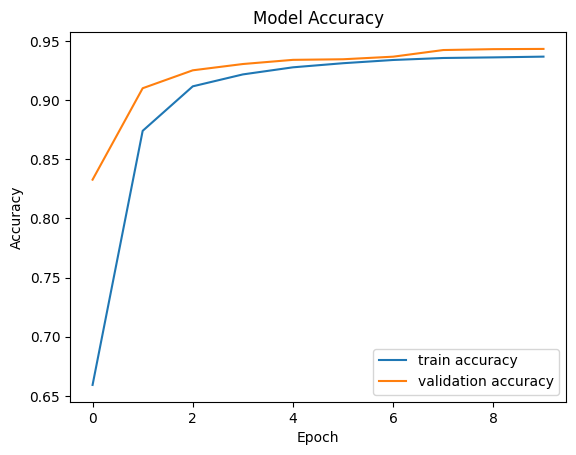

In [51]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
